COVID19 FORECAST -- Pythonでの予測
==============
-------------

ここでは、ridge回帰を使ってコロナウイルス新規陽性者数の28日後予測値を推定します。  
今回使うデータセットはGoogleのCovid-19 forecastと同じソースを用いており、データセットの作成過程は[dataset1_kato.ipynb]()に記載しています。  
pythonでの分析過程は一般的なデータ分析と同様に以下の5ステップに沿って進めていきます。　　
+ 1. データの読み込み
+ 2. 特徴洗い出し
+ 3. データの前処理
+ 4. モデルの作成と評価
+ 5. データ予測


## 1. データの読み込み

[GitHubへのリンク](https://github.com/ayanekato/COVID-19)

こちらのページにて今回使う下記のCSVをダウロードできます。
* training_set.csv （38 KB）
* test_set.csv（5 KB）

In [1]:
# numpy, pandas, matplotlib.pyplotをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# train.csvの読み込み
train = pd.read_csv('training_set.csv')
# '日付'列を日付型に変更してindexに設定
train['日付'] = pd.to_datetime(train['日付'])
train = train.set_index('日付')
train

,入院治療を要する者,死亡者数,実効再生産数,国立感染症研究所,検疫所,地方衛生研究所・保健所,民間検査会社,大学等,医療機関,PCR 検査実施件数(単日),testedPositive,peopleTested,hospitalized,discharged,effectiveReproductionNumber,退院、療養解除となった者,重症者数,PCR 検査陽性者数(単日)
日付,,,,,,,,,,,,,,,,,,
2020-02-04,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2
2020-02-05,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,2
2020-02-06,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0
2020-02-07,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0
2020-02-08,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,0.0,0.00,9.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,18426.0,2000.0,1.24,0.0,0.0,4434.0,19997.0,3819.0,10851.0,43773.0,134075.0,3035579.0,18129.0,113494.0,76.29,113394.0,376.0,1217
2020-11-25,18565.0,2021.0,1.17,0.0,0.0,6150.0,30118.0,3293.0,8548.0,41052.0,135908.0,3079150.0,18327.0,115221.0,61.60,115032.0,410.0,1930
2020-11-26,19105.0,2050.0,1.13,0.0,0.0,6102.0,29786.0,2972.0,8219.0,42634.0,138289.0,3122639.0,18849.0,117060.0,57.48,116778.0,435.0,2499


In [3]:
# 同様にしてtest_set.csvの読み込み
test = pd.read_csv('test_set.csv')
test['日付'] = pd.to_datetime(test['日付'])
test = test.set_index('日付')
test

,入院治療を要する者,死亡者数,実効再生産数,国立感染症研究所,検疫所,地方衛生研究所・保健所,民間検査会社,大学等,医療機関,PCR 検査実施件数(単日),testedPositive,peopleTested,hospitalized,discharged,effectiveReproductionNumber,退院、療養解除となった者,重症者数
日付,,,,,,,,,,,,,,,,,
2020-11-29,20914.0,2118.0,1.01,0.0,0.0,3978.0,7068.0,848.0,3415.0,11975.0,145368.0,3202730.0,20571.0,122301.0,59.31,122072.0,472.0
2020-11-30,20900.0,2138.0,0.97,0.0,0.0,4309.0,24335.0,3585.0,10736.0,41335.0,147197.0,3236763.0,20587.0,124228.0,65.68,124088.0,493.0
2020-12-01,20601.0,2171.0,1.04,0.0,0.0,5230.0,28197.0,3330.0,9971.0,44289.0,148999.0,3287415.0,20332.0,126053.0,61.75,125897.0,488.0
2020-12-02,21044.0,2212.0,1.07,0.0,0.0,6034.0,27651.0,3255.0,9189.0,43236.0,151396.0,3328558.0,20799.0,128029.0,59.69,127814.0,497.0
2020-12-03,21567.0,2239.0,1.07,0.0,0.0,5531.0,26870.0,3249.0,8859.0,36823.0,153873.0,3366404.0,21285.0,129939.0,60.00,129740.0,505.0
2020-12-04,21739.0,2282.0,1.06,0.0,0.0,5323.0,27910.0,2490.0,7646.0,38145.0,156271.0,3405043.0,21457.0,132147.0,59.07,131995.0,520.0
2020-12-05,22249.0,2314.0,1.04,0.0,0.0,5239.0,24819.0,718.0,3615.0,22313.0,158670.0,3429116.0,21925.0,133925.0,61.52,133820.0,519.0
2020-12-06,22535.0,2334.0,1.04,0.0,0.0,3728.0,6998.0,808.0,3280.0,17612.0,160595.0,3449027.0,22181.0,135550.0,62.85,135434.0,530.0
2020-12-07,22187.0,2381.0,1.05,0.0,0.0,4786.0,25810.0,4042.0,11567.0,37737.0,162364.0,3481482.0,21832.0,137543.0,61.95,137516.0,536.0


In [4]:
#test_set.csvには、目的変数である 'PCR 検査陽性者数(単日)' のカラムが無い

## 2. 特徴洗い出し

## ①基本統計量を確認

In [5]:
#基本統計量を確認
train.describe()

,入院治療を要する者,死亡者数,実効再生産数,国立感染症研究所,検疫所,地方衛生研究所・保健所,民間検査会社,大学等,医療機関,PCR 検査実施件数(単日),testedPositive,peopleTested,hospitalized,discharged,effectiveReproductionNumber,退院、療養解除となった者,重症者数,PCR 検査陽性者数(単日)
count,299.000000,289.000000,273.000000,285.000000,285.000000,285.000000,285.000000,285.000000,268.000000,295.000000,295.000000,2.950000e+02,295.000000,295.000000,295.000000,299.000000,298.000000,299.000000
mean,5421.434783,933.968858,1.144579,42.694737,382.915789,2777.642105,7420.908772,1142.768421,1899.444030,10710.050847,41044.772881,8.945630e+05,5347.745763,34686.908475,37.269864,34254.160535,139.211409,482.983278
std,4683.632789,623.702622,0.346362,89.585006,464.428696,1626.745946,7029.344785,934.405804,2138.569062,11765.930093,39493.904912,9.381215e+05,4563.396434,36023.242134,25.668625,36043.261801,96.317860,534.564964
min,6.000000,1.000000,0.500000,0.000000,0.000000,398.000000,0.000000,0.000000,9.000000,4.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,985.500000,348.000000,0.900000,0.000000,0.000000,1416.000000,1739.000000,354.000000,343.750000,2174.000000,11597.000000,1.169050e+05,1044.500000,2252.500000,15.540000,1097.000000,56.250000,52.500000
50%,5176.000000,979.000000,1.090000,0.000000,61.000000,2458.000000,3810.000000,956.000000,878.000000,5866.000000,19065.000000,4.457480e+05,5176.000000,16687.000000,36.910000,16654.000000,143.500000,370.000000
75%,8405.500000,1481.000000,1.340000,36.000000,732.000000,4000.000000,13793.000000,1819.000000,3402.250000,18880.500000,75733.500000,1.595962e+06,8502.500000,67988.500000,56.025000,67413.500000,209.750000,645.000000
max,20992.000000,2105.000000,2.270000,517.000000,1733.000000,8061.000000,30118.000000,3819.000000,10851.000000,103676.000000,143372.000000,3.188200e+06,20660.000000,120664.000000,93.720000,120530.000000,462.000000,2674.000000


## ②可視化する

## 折れ線グラフ

C:\Users\kayne\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kayne\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kayne\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kayne\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


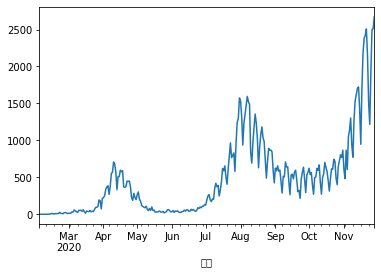

In [6]:
train['PCR 検査陽性者数(単日)'].plot()

次に、Matplotlibを使って可視化します。（ヒストグラム、相関行列(ヒートマップ)）

## 棒グラフ

In [7]:
# 先ほど見た通り「曜日でグループ分けして棒グラフを作り、有意に差が見られたら曜日ダミーを追加」します
# まずは月曜日が0、日曜日が6となる整数で曜日の情報を取得
print(train.index.weekday)

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            ...
            3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
           dtype='int64', name='日付', length=299)


In [8]:
# 先に月ダミーと曜日ダミーをdfに追加
train['曜日'] = train.index.weekday
train['月'] = train.index.month
train

,入院治療を要する者,死亡者数,実効再生産数,国立感染症研究所,検疫所,地方衛生研究所・保健所,民間検査会社,大学等,医療機関,PCR 検査実施件数(単日),testedPositive,peopleTested,hospitalized,discharged,effectiveReproductionNumber,退院、療養解除となった者,重症者数,PCR 検査陽性者数(単日),曜日,月
日付,,,,,,,,,,,,,,,,,,,,
2020-02-04,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,1,2
2020-02-05,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,2,2,2
2020-02-06,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0,3,2
2020-02-07,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0,4,2
2020-02-08,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,0.0,0.00,9.0,0.0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,18426.0,2000.0,1.24,0.0,0.0,4434.0,19997.0,3819.0,10851.0,43773.0,134075.0,3035579.0,18129.0,113494.0,76.29,113394.0,376.0,1217,1,11
2020-11-25,18565.0,2021.0,1.17,0.0,0.0,6150.0,30118.0,3293.0,8548.0,41052.0,135908.0,3079150.0,18327.0,115221.0,61.60,115032.0,410.0,1930,2,11
2020-11-26,19105.0,2050.0,1.13,0.0,0.0,6102.0,29786.0,2972.0,8219.0,42634.0,138289.0,3122639.0,18849.0,117060.0,57.48,116778.0,435.0,2499,3,11


C:\Users\kayne\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kayne\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26332 missing from current font.
  font.set_text(s, 0, flags=flags)


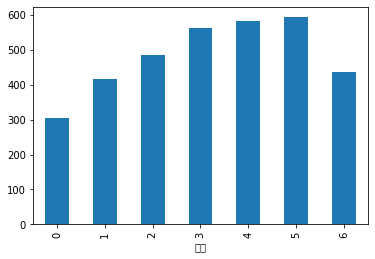

In [9]:
# 曜日でグループ分け
group = train.groupby('曜日')

# グループごとの平均値を計算
group.mean()['PCR 検査陽性者数(単日)'].plot.bar()

# ※月曜日が0、日曜日が6

In [10]:
# 最小値の月曜に比べ、最大値の金曜は2倍近くになっており、やはり曜日が大きく影響している

C:\Users\kayne\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kayne\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26376 missing from current font.
  font.load_char(ord(s), flags=flags)


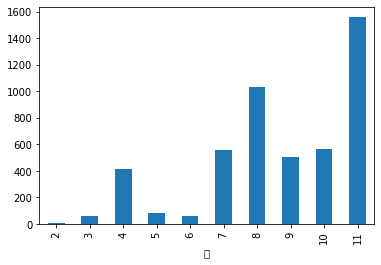

In [11]:
# 月でもグループ分け
group_m = train.groupby('月')

# グループごとの平均値を計算
group_m.mean()['PCR 検査陽性者数(単日)'].plot.bar()

In [12]:
# 折れ線グラフで見た通り、4,8,11月に山がある
# 可視化の結果、月ダミーと曜日ダミーどちらも採用することにするので、testにも月、曜日ダミーを追加しておきます

test['曜日'] = test.index.weekday
test['月'] = test.index.month

## 相関行列とヒートマップ

In [13]:
# 相関係数を計算
corr = train.corr() 
corr

,入院治療を要する者,死亡者数,実効再生産数,国立感染症研究所,検疫所,地方衛生研究所・保健所,民間検査会社,大学等,医療機関,PCR 検査実施件数(単日),testedPositive,peopleTested,hospitalized,discharged,effectiveReproductionNumber,退院、療養解除となった者,重症者数,PCR 検査陽性者数(単日),曜日,月
入院治療を要する者,1.000000,0.499625,-0.262092,-0.116495,-0.307554,0.771198,0.623198,0.430337,0.525310,0.578136,0.629226,0.575995,0.996252,0.552870,0.626492,0.557338,0.861284,0.809573,0.011625,0.587526
死亡者数,0.499625,1.000000,-0.239579,-0.466981,-0.246895,0.221739,0.783050,0.698218,0.764099,0.659137,0.924577,0.916890,0.533478,0.926544,0.441885,0.927141,0.465249,0.607425,-0.000403,0.978524
実効再生産数,-0.262092,-0.239579,1.000000,0.327183,0.216086,0.032197,-0.115091,-0.139083,-0.105340,-0.108656,-0.185070,-0.128408,-0.246361,-0.167563,0.375089,-0.166857,-0.538472,0.080201,-0.003549,-0.156833
国立感染症研究所,-0.116495,-0.466981,0.327183,1.000000,0.083147,0.009074,-0.313657,-0.287692,-0.253155,-0.252257,-0.352994,-0.346240,-0.138155,-0.359844,0.069000,-0.360970,-0.106221,-0.156502,0.000355,-0.422792
検疫所,-0.307554,-0.246895,0.216086,0.083147,1.000000,-0.081529,-0.375419,-0.253067,-0.523078,-0.382579,-0.510422,-0.500529,-0.318313,-0.512845,0.003453,-0.512425,-0.313022,-0.292258,0.109385,-0.294884
地方衛生研究所・保健所,0.771198,0.221739,0.032197,0.009074,-0.081529,1.000000,0.561781,0.378500,0.314892,0.472956,0.306379,0.269573,0.780553,0.231167,0.714788,0.230025,0.520921,0.738994,-0.041706,0.321230
民間検査会社,0.623198,0.783050,-0.115091,-0.313657,-0.375419,0.561781,1.000000,0.777549,0.828393,0.818636,0.813169,0.798570,0.656335,0.791576,0.524163,0.791795,0.473299,0.780645,-0.129644,0.809808
大学等,0.430337,0.698218,-0.139083,-0.287692,-0.253067,0.378500,0.777549,1.000000,0.858838,0.759869,0.669046,0.661790,0.456392,0.661274,0.421250,0.661603,0.372352,0.456594,-0.432853,0.709828
医療機関,0.525310,0.764099,-0.105340,-0.253155,-0.523078,0.314892,0.828393,0.858838,1.000000,0.784483,0.849224,0.848990,0.554213,0.840894,0.407911,0.840601,0.456553,0.607353,-0.276430,0.793459
PCR 検査実施件数(単日),0.578136,0.659137,-0.108656,-0.252257,-0.382579,0.472956,0.818636,0.759869,0.784483,1.000000,0.709089,0.695657,0.599693,0.687936,0.492111,0.690681,0.455250,0.650905,-0.217497,0.695412


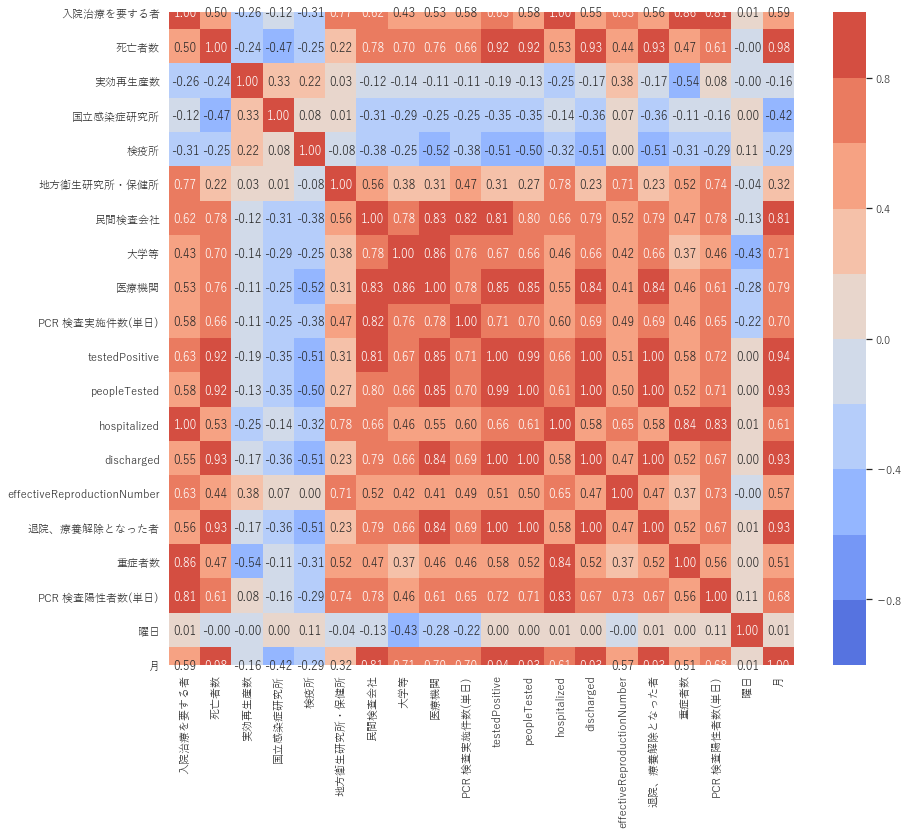

In [14]:
# 上の相関行列を見やすくするためにseabornでヒートマップにします
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.set(font='Yu Gothic')
sns.heatmap(corr, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
plt.show()

## 3. データの前処理

## ①欠損値の補完

In [15]:
#trainの欠損値
train.isnull().sum()

入院治療を要する者                       0
死亡者数                           10
実効再生産数                         26
国立感染症研究所                       14
検疫所                            14
地方衛生研究所・保健所                    14
民間検査会社                         14
大学等                            14
医療機関                           31
PCR 検査実施件数(単日)                  4
testedPositive                  4
peopleTested                    4
hospitalized                    4
discharged                      4
effectiveReproductionNumber     4
退院、療養解除となった者                    0
重症者数                            1
PCR 検査陽性者数(単日)                  0
曜日                              0
月                               0
dtype: int64

In [16]:
# 'PCR 検査実施件数(単日)'は前後の値から線形補間します
train['PCR 検査実施件数(単日)'] = train['PCR 検査実施件数(単日)'].interpolate()

# 'PCR 検査実施件数(単日)'以外はすべて最初の行に欠損があるので、「該当者0」または「データ未取得」と考え、全て0に置き換えます
train = train.replace(np.nan,0)

In [17]:
#testの欠損値
test.isnull().sum()

入院治療を要する者                      0
死亡者数                           0
実効再生産数                         0
国立感染症研究所                       0
検疫所                            0
地方衛生研究所・保健所                    0
民間検査会社                         0
大学等                            0
医療機関                           0
PCR 検査実施件数(単日)                 0
testedPositive                 0
peopleTested                   0
hospitalized                   0
discharged                     0
effectiveReproductionNumber    0
退院、療養解除となった者                   0
重症者数                           0
曜日                             0
月                              0
dtype: int64

In [18]:
test = test.replace(np.nan,0)

In [19]:
# 確かに欠損値がなくなったことを確認
train.isnull().sum()

入院治療を要する者                      0
死亡者数                           0
実効再生産数                         0
国立感染症研究所                       0
検疫所                            0
地方衛生研究所・保健所                    0
民間検査会社                         0
大学等                            0
医療機関                           0
PCR 検査実施件数(単日)                 0
testedPositive                 0
peopleTested                   0
hospitalized                   0
discharged                     0
effectiveReproductionNumber    0
退院、療養解除となった者                   0
重症者数                           0
PCR 検査陽性者数(単日)                 0
曜日                             0
月                              0
dtype: int64

In [20]:
test.isnull().sum()

入院治療を要する者                      0
死亡者数                           0
実効再生産数                         0
国立感染症研究所                       0
検疫所                            0
地方衛生研究所・保健所                    0
民間検査会社                         0
大学等                            0
医療機関                           0
PCR 検査実施件数(単日)                 0
testedPositive                 0
peopleTested                   0
hospitalized                   0
discharged                     0
effectiveReproductionNumber    0
退院、療養解除となった者                   0
重症者数                           0
曜日                             0
月                              0
dtype: int64

## ②特徴量の選択

In [21]:
# 今回使わない列データは削除する
del train['実効再生産数'], train['国立感染症研究所'], train['検疫所'] 

del test['実効再生産数'], test['国立感染症研究所'], test['検疫所'] 

In [22]:
# 残ったカラムは以下
list = train.columns
for i in range(len(list)):
    print(list[i])

入院治療を要する者
死亡者数
地方衛生研究所・保健所
民間検査会社
大学等
医療機関
PCR 検査実施件数(単日)
testedPositive
peopleTested
hospitalized
discharged
effectiveReproductionNumber
退院、療養解除となった者
重症者数
PCR 検査陽性者数(単日)
曜日
月


## ③データの分割

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
# X（説明変数）に'PCR 検査陽性者数(単日)'以外の列を格納　
X = train.drop('PCR 検査陽性者数(単日)',axis=1)

In [25]:
# y（目的変数）に'Survived'の列のみを格納
y = train['PCR 検査陽性者数(単日)']

In [26]:
# データの分割　(分割比率は0.3, 乱数固定)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## 4. モデルの作成と評価

In [28]:
# 今回はridge回帰でモデル作成します
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(X_train, y_train)
y_pred = rg.predict(X_test)

In [29]:
# 精度を確認
print("MAE : {:5.2f} ".format(mean_absolute_error(y_test, y_pred)))
print("MSE : {:5.2f} ".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {:5.2f} ".format(np.sqrt(mean_squared_error(y_test, y_pred))))

MAE : 126.52 
MSE : 31125.82 
RMSE: 176.43 


## 5. データ予測

In [30]:
# 'test'を使ってリッジ回帰(rg)で予測
pred = rg.predict(test)
pred

array([1614.67468877, 1760.37664421, 1927.64457009, 1999.49039414,
       1968.63437533, 2057.28132004, 2173.56670313, 1573.54977514,
       1829.02103425, 2094.74325187, 2332.47011706, 2437.00261324,
       2638.60979222, 2558.96963799, 1992.40463544, 2177.30401352,
       2587.34003769, 2746.92333093, 2759.07728975, 2778.47584118,
       2824.87329877, 2214.56017769, 2569.22924133, 3061.10304649,
       3171.63038414, 3285.71160484, 3558.82225788, 3518.09911594])

In [31]:
# 予測結果をデータフレームの形にする
data = {'日付':test.index.values, 'Python予測値':pred}
df_submit = pd.DataFrame(data)
df_submit

,日付,Python予測値
0,2020-11-29,1614.674689
1,2020-11-30,1760.376644
2,2020-12-01,1927.644570
3,2020-12-02,1999.490394
4,2020-12-03,1968.634375
5,2020-12-04,2057.281320
6,2020-12-05,2173.566703
7,2020-12-06,1573.549775
8,2020-12-07,1829.021034
9,2020-12-08,2094.743252


In [32]:
# データフレームをcsvとして保存
df_submit.to_csv('python_predict.csv',index=False)